<a href="https://colab.research.google.com/github/debangana97/Data-science-works/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [ ]:
data = pd.read_csv('GRIP- Linear Reg. data.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The above table shows the five number summary of the data giving the minimum and maximum value, mean, median, 1st and 3rd quartile of the two variables.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


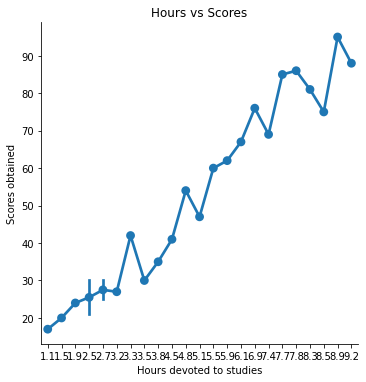

In [ ]:
#Data visualization
sns.factorplot(x= 'Hours', y= 'Scores', data=data)
plt.title('Hours vs Scores')
plt.xlabel('Hours devoted to studies')
plt.ylabel('Scores obtained')
plt.show()

**The factorplot clearly indicates that there is a strong positive correlation between hours studied and scores obtained by student. Hence, a simple linear regression can be used to predict scores using hours.**

### Identifying the dependent and independent variable

In [ ]:
x = data.iloc[:, :-1].values
print(x)
y = data.iloc[:, 1].values
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
print(x_train, x_test)

[[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Fitting the linear regression model on the training set

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear regression coefficient:  [9.94167834]
Model intercept:  1.9322042531516601


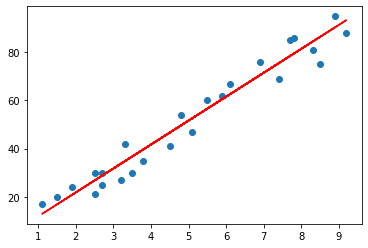

In [ ]:
#Linear Regression eqn.: y = a + bx, where 'a' is the intercept and 'b' is the slope(regression coefficient)
print('Linear regression coefficient: ', lin_reg.coef_)
print('Model intercept: ', lin_reg.intercept_)
plt.scatter(x, y)
reg_line = lin_reg.coef_*x + lin_reg.intercept_
plt.plot(x, reg_line, color='red')
plt.show()

### Predicting the test set result

In [ ]:
y_pred = lin_reg.predict(x_test)
compare = pd.DataFrame({'TrueValue': y_test, 'PredictedValue': y_pred})
compare

,TrueValue,PredictedValue
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


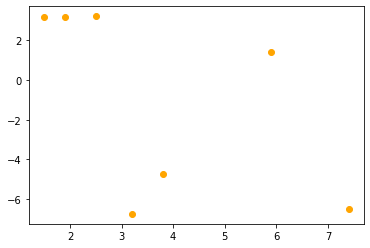

In [ ]:
#Plotting residual plot
residual = y_test - y_pred
plt.scatter(x_test, residual, color='orange')
plt.show() 

**Since the residual plot shows randomness and no pattern, so the linear regression model proves to be a good fit to the data.**

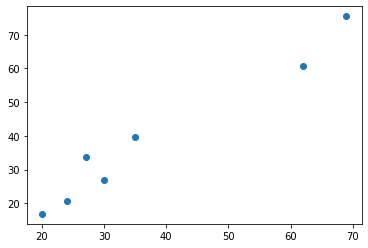

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

This plot shows that the predictions made by the model also satisfies the strong positive linear relationship between the two variables x and y.

In [ ]:
#Predicting a new test data
hours_new = [[9.25]]
pred = lin_reg.predict(hours_new)
print("No.of Hours studied = {}".format(hours_new))
print("Predicted Score of the student = {}".format(pred[0]))

No.of Hours studied = [[9.25]]
Predicted Score of the student = 93.89272889341652


### Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error
MAE(y_test, y_pred)

4.130879918502482

The mean absolute error gives the difference between the actual and the predicted values on an average.

In [ ]:
#Calculating the value of r-square
r_sq = lin_reg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9525462098246908


**Interpretation**: About 95% of the total variability is explained by the independent variable of the linear regression model.